# TD 1: Simple MLP from scratch



Further material
https://github.com/karpathy/micrograd


# Preliminary

Go to 
https://playground.tensorflow.org/
and tinker with the different architectures parameters. 

What do the colors on the edges mean? On the nodes?

If necessary: install pytorch by running 

`pip3 install torch`

(in a a virtual environment)

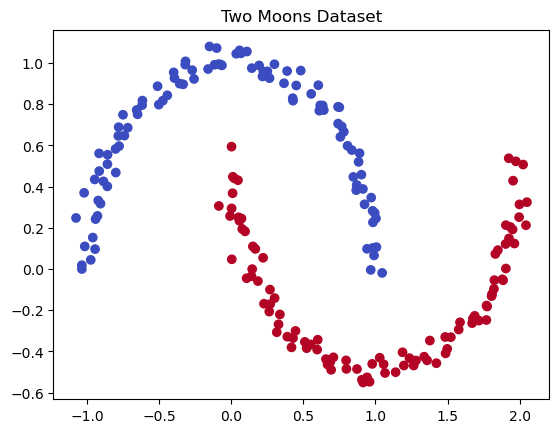

Generated data X shape: (200, 2), y shape: (200, 1)


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Generate synthetic data
X, y = make_moons(n_samples=200, noise=0.04, random_state=42)
y = y.reshape(-1, 1)
# print(f"{X.shape=}")
# print(f"{y.shape=}")

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm)
plt.title("Two Moons Dataset")
plt.show()
print(f"Generated data X shape: {X.shape}, y shape: {y.shape}")


## Implementing a Neural Network from Scratch

Implement backpropagation on the following network
$$
\begin{aligned}
z^{(1)} &= X W_1 + b_1\\[4pt]
a^{(1)} &= \tanh\big(z^{(1)}\big)\\[4pt]
z^{(2)} &= a^{(1)} W_2 + b_2\\[4pt]
a^{(2)} &= \mathrm{Sigmoid}\big(z^{(2)}\big) = \frac{1}{1+e^{-z^{(2)}}}\\[4pt]
\hat{y} &= a^{(2)}
\end{aligned}
$$

Step 1: Initialize parameters
- What are the dimensions of $W_1, b_1, W_2, b_2$? 

In [32]:
def init_params(n_input, n_hidden, n_output, seed=0):
    np.random.seed(seed)
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))
    return W1, b1, W2, b2

Step 2: Forward propagation


Write the dimensions of intermediate array you compute


In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def tanh(z):
    return np.tanh(z)


def forward(X, W1, b1, W2, b2):
    """
    X.shape = (m, n_input)
    W1.shape = (n_input, n_hidden)
    b1.shape = (1, n_hidden)
    W2.shape = (n_hidden, n_output)
    b2.shape = (1, n_output)
    """
    z1 = X @ W1 + b1  # m, n_hidden
    a1 = tanh(z1)  # m, n_hidden
    z2 = a1 @ W2 + b2  # m, n_output
    a2 = sigmoid(z2)  # m, n_output
    return z1, a1, z2, a2


In [34]:
def compute_loss(y, a2):
    # log loss for binary classification
    # y : m, 1
    # a2: m, 1
    return -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))

## Backpropagation (brief)

Network: input X (m×2) → linear1 z1 = XW1 + b1 (m×h) → a1 = tanh(z1) (m×h) → z2 = a1W2 + b2 (m×1) → a2 = σ(z2) (m×1)  
Loss: binary cross‑entropy (averaged over m).

Key derivatives (used in `backward`):

- Output layer (sigmoid + BCE):
    - dL/dz2 = a2 - y  (m×1) — for BCE with sigmoid the derivative simplifies to this.
    - dW2 = (a1^T @ (dL/dz2)) / m  (h×1)
    - db2 = mean(dL/dz2, axis=0, keepdims=True)  (1×1)

- Hidden layer (tanh activation):
    - dL/da1 = dL/dz2 @ W2^T  (m×h)
    - derivative of tanh: d tanh(z1)/dz1 = 1 - tanh(z1)^2
    - dL/dz1 = (dL/da1) * (1 - tanh(z1)**2)  (elementwise)  (m×h)
    - dW1 = (X^T @ (dL/dz1)) / m  (input_dim×h)
    - db1 = mean(dL/dz1, axis=0, keepdims=True)  (1×h)
    

In [35]:
def backward(X, y, z1, a1, a2, W2):
    m = y.shape[0]  # batch size
    dz2 = a2 - y
    dW2 = (a1.T @ dz2) / m
    db2 = np.mean(dz2, axis=0, keepdims=True)  # (1, n_hidden)
    dz1 = (dz2 @ W2.T) * (1 - np.tanh(z1) ** 2)
    dW1 = (X.T @ dz1) / m
    db1 = np.mean(dz1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2


Implement the gradient descent updates.
(Bonus: add momentum?)

In [36]:
def gd_step(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=0.1):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2


# Full training

Epoch 0, loss = 0.6931
Epoch 1000, loss = 0.2578
Epoch 2000, loss = 0.2569
Epoch 3000, loss = 0.2565
Epoch 4000, loss = 0.2562
Epoch 5000, loss = 0.2560
Epoch 6000, loss = 0.2559
Epoch 7000, loss = 0.2557
Epoch 8000, loss = 0.2556
Epoch 9000, loss = 0.2555
Epoch 10000, loss = 0.2553
Epoch 11000, loss = 0.2508
Epoch 12000, loss = 0.0845
Epoch 13000, loss = 0.0270
Epoch 14000, loss = 0.0132
Epoch 15000, loss = 0.0081
Epoch 16000, loss = 0.0057
Epoch 17000, loss = 0.0043
Epoch 18000, loss = 0.0034
Epoch 19000, loss = 0.0028
Epoch 20000, loss = 0.0024
Epoch 21000, loss = 0.0021
Epoch 22000, loss = 0.0018
Epoch 23000, loss = 0.0016
Epoch 24000, loss = 0.0015
Epoch 25000, loss = 0.0013
Epoch 26000, loss = 0.0012
Epoch 27000, loss = 0.0011
Epoch 28000, loss = 0.0010
Epoch 29000, loss = 0.0010
Epoch 30000, loss = 0.0009
Epoch 31000, loss = 0.0008
Epoch 32000, loss = 0.0008
Epoch 33000, loss = 0.0007
Epoch 34000, loss = 0.0007
Epoch 35000, loss = 0.0007
Epoch 36000, loss = 0.0006
Epoch 37000, l

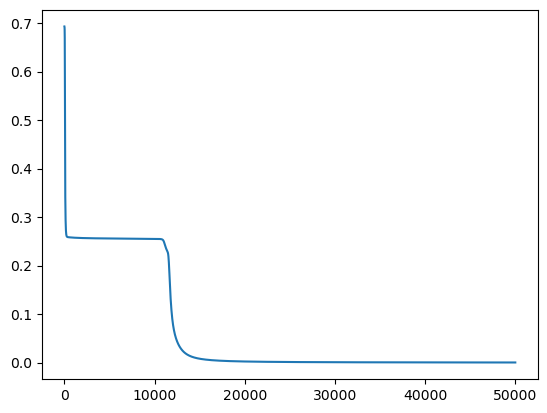

In [37]:
N_steps = 50_000
lr = 0.2
W1, b1, W2, b2 = init_params(2, 10, 1, seed=0)
train_losses = []
for epoch in range(N_steps):
    # Forward pass
    z1, a1, z2, a2 = forward(X, W1, b1, W2, b2)
    loss = compute_loss(y, a2)
    # Backward pass
    dW1, db1, dW2, db2 = backward(X, y, z1, a1, a2, W2)
    # Gradient descent step
    W1, b1, W2, b2 = gd_step(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=lr)
    # Logging
    train_losses.append(loss)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss = {loss:.4f}")

plt.plot(train_losses)


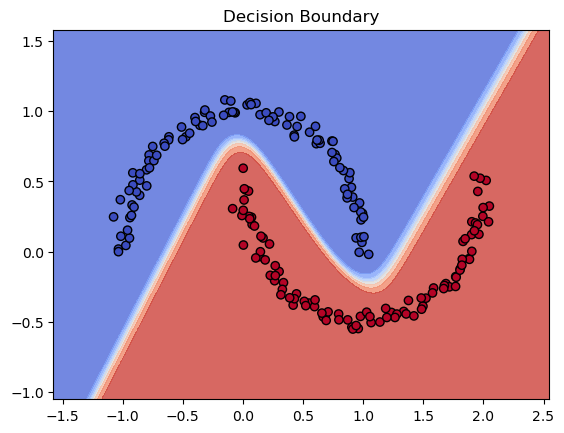

In [39]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, probs = model(grid)
    probs = probs.reshape(xx.shape)
    plt.contourf(xx, yy, probs, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.show()


def model(X):
    return forward(X, W1, b1, W2, b2)


plot_decision_boundary(model, X, y)

In practice, the approach used here does not scale well in terms of code: 
- we hardcoded the functions used in the backwards function. If we wanted to replace 
tanh by another function, we would have to carefully track where its gradient is 
computed. 
- all the arguments have to be passed through multiple times

Automatic differentiation libraries represent parameters by objects that store :
- a computational graph, in which the children of a node are the parameters that depend 
on that node. (Technically, node stores its parents.) The forward pass builds the 
graph, and the backward pass traverses it in reverse to compute gradients.
- the gradient of that parameter accumulated during the backward pass.

(see micrograd, autograd, pytorch). 

This approach makes it easy to compose a large number of functions together and differentiate them.


### Checking gradient correctness with Pytorch

In [40]:
import torch

hidden_dim = 10

W1, b1, W2, b2 = init_params(2, hidden_dim, 1, seed=64)

X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

W1_t = torch.nn.Parameter(torch.tensor(W1, dtype=torch.float32, requires_grad=True))
b1_t = torch.nn.Parameter(torch.tensor(b1, dtype=torch.float32, requires_grad=True))
W2_t = torch.nn.Parameter(torch.tensor(W2, dtype=torch.float32, requires_grad=True))
b2_t = torch.nn.Parameter(torch.tensor(b2, dtype=torch.float32, requires_grad=True))

# Forward pass
z1_t = X_t @ W1_t + b1_t
a1_t = torch.tanh(z1_t)
z2_t = a1_t @ W2_t + b2_t
a2_t = torch.sigmoid(z2_t)
loss_t = torch.nn.functional.binary_cross_entropy(a2_t, y_t)

# Backward pass
loss_t.backward()

print("With PyTorch:")
print("dW1:", W1_t.grad.numpy())
print("dW2:", W2_t.grad.numpy())
print("\n")

print("Manual backward:")
z1, a1, z2, a2 = forward(X, W1, b1, W2, b2)
dW1, db1, dW2, db2 = backward(X, y, z1, a1, a2, W2)
print("dW1:", dW1)
print("dW2:", dW2)

With PyTorch:
dW1: [[ 0.00113827  0.00338875  0.00099047 -0.00148265  0.00343661 -0.00127756
   0.00135095  0.0012253  -0.00081304 -0.00184371]
 [-0.00086524 -0.00257736 -0.00075284  0.00112788 -0.0026137   0.00097092
  -0.00102691 -0.00093126  0.00061862  0.00140129]]
dW2: [[-2.0164428e-03]
 [ 8.2676318e-03]
 [ 6.0405710e-04]
 [-4.9122442e-03]
 [ 4.8368275e-03]
 [ 7.5816578e-04]
 [ 1.8764428e-03]
 [-1.6839491e-05]
 [ 5.7238275e-03]
 [-2.4890539e-03]]


Manual backward:
dW1: [[ 0.00113827  0.00338874  0.00099047 -0.00148265  0.00343661 -0.00127756
   0.00135095  0.0012253  -0.00081304 -0.00184371]
 [-0.00086524 -0.00257736 -0.00075284  0.00112788 -0.0026137   0.00097092
  -0.00102691 -0.00093126  0.00061861  0.00140129]]
dW2: [[-2.01644269e-03]
 [ 8.26762995e-03]
 [ 6.04057101e-04]
 [-4.91224425e-03]
 [ 4.83682664e-03]
 [ 7.58165776e-04]
 [ 1.87644280e-03]
 [-1.68392865e-05]
 [ 5.72382857e-03]
 [-2.48905386e-03]]


# Slide figures

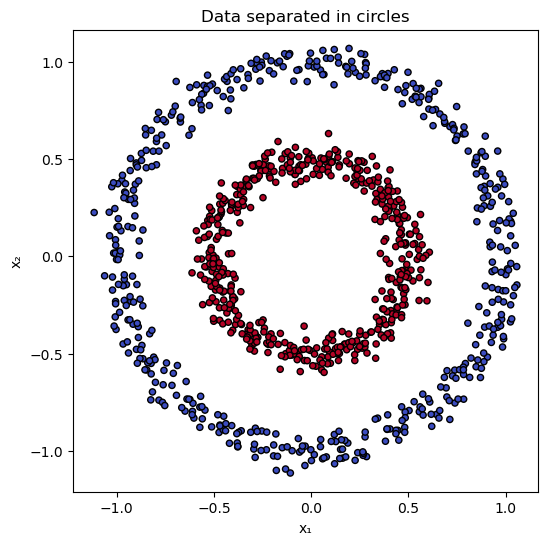

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate synthetic data: points in two concentric circles
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Visualize it
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolor="k")
plt.title("Data separated in circles")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.axis("equal")
plt.show()


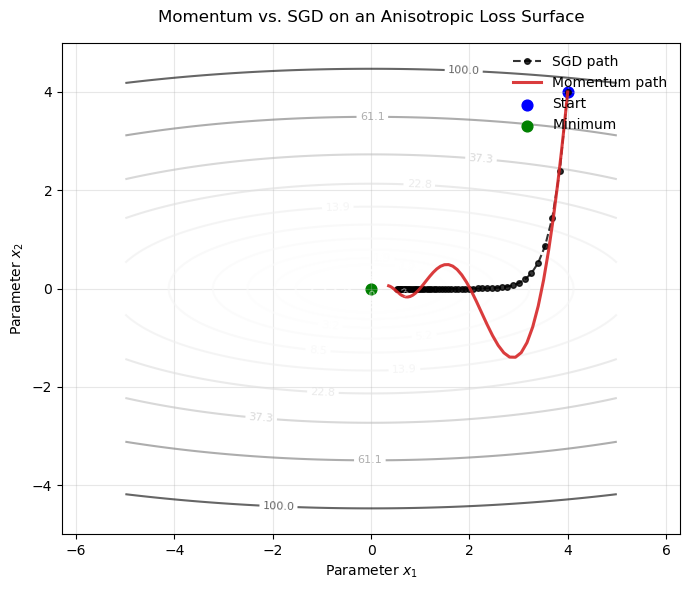

In [27]:
import numpy as np
import matplotlib.pyplot as plt


# Quadratic valley: f(x, y) = 0.5 * (x^2 + 10y^2)
def grad(x, y):
    return np.array([x, 10 * y])


# Parameters
eta = 0.04  # smaller LR for smoother path
beta = 0.85  # moderate momentum
steps = 50
start = np.array([4.0, 4.0])

# --- SGD ---
x_sgd = [start.copy()]
x = start.copy()
for _ in range(steps):
    x -= eta * grad(*x)
    x_sgd.append(x.copy())

# --- Momentum ---
x_mom = [start.copy()]
x = start.copy()
v = np.zeros(2)
for _ in range(steps):
    g = grad(*x)
    v = beta * v + (1 - beta) * g
    x -= eta * v
    x_mom.append(x.copy())

x_sgd = np.array(x_sgd)
x_mom = np.array(x_mom)

# --- Loss surface ---
x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 10 * Y**2)

# --- Plot ---
plt.figure(figsize=(7, 6))
contours = plt.contour(X, Y, Z, levels=np.logspace(-1, 2, 15), cmap="Greys", alpha=0.6)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# Trajectories
plt.plot(
    x_sgd[:, 0],
    x_sgd[:, 1],
    "o--",
    color="black",
    markersize=4,
    label="SGD path",
    alpha=0.8,
)
plt.plot(
    x_mom[:, 0],
    x_mom[:, 1],
    "-",
    color="#d62728",
    lw=2.2,
    label="Momentum path",
    alpha=0.9,
)

# Start/end markers
plt.scatter(*x_sgd[0], color="blue", s=60, label="Start")
plt.scatter(0, 0, color="green", s=60, label="Minimum")

# Labels & styling
plt.xlabel("Parameter $x_1$")
plt.ylabel("Parameter $x_2$")
plt.title("Momentum vs. SGD on an Anisotropic Loss Surface", pad=15)
plt.legend(loc="upper right", frameon=False)
plt.axis("equal")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


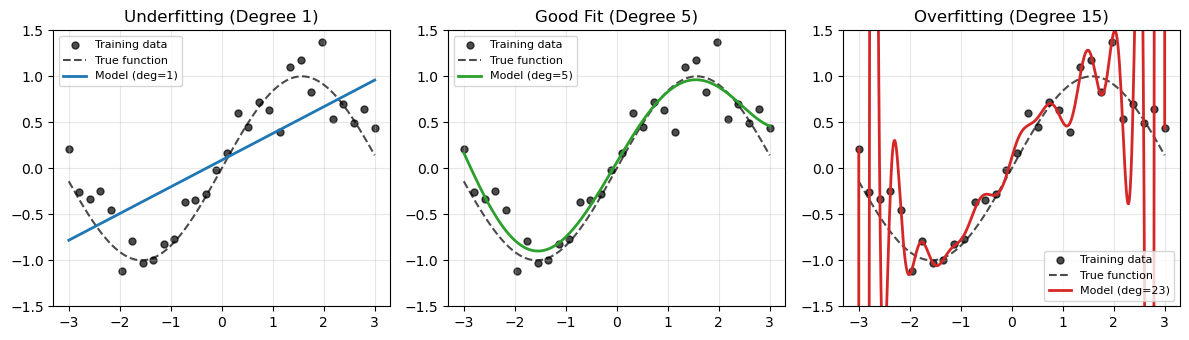

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# --- Generate noisy data ---
np.random.seed(0)
x = np.linspace(-3, 3, 30)
y_true = np.sin(x)
y_noisy = y_true + 0.2 * np.random.randn(len(x))

# --- Fit polynomials of increasing degree ---
degrees = [1, 5, 23]  # underfit, good fit, overfit
colors = ["#1f77b4", "#2ca02c", "#d62728"]
titles = ["Underfitting (Degree 1)", "Good Fit (Degree 5)", "Overfitting (Degree 15)"]

x_fit = np.linspace(-3, 3, 400)

plt.figure(figsize=(12, 3.5))

for i, deg in enumerate(degrees):
    coefs = np.polyfit(x, y_noisy, deg)
    y_pred = np.polyval(coefs, x_fit)

    plt.subplot(1, 3, i + 1)
    plt.scatter(x, y_noisy, color="black", s=25, label="Training data", alpha=0.7)
    plt.plot(x_fit, np.sin(x_fit), "k--", label="True function", alpha=0.7)
    plt.plot(x_fit, y_pred, color=colors[i], lw=2, label=f"Model (deg={deg})")

    plt.title(titles[i])
    plt.ylim(-1.5, 1.5)
    plt.legend(fontsize=8)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
